In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
df = pd.read_csv('input/allegheny_corona.csv', dtype=np.int32)
df = df.set_index('days_since')

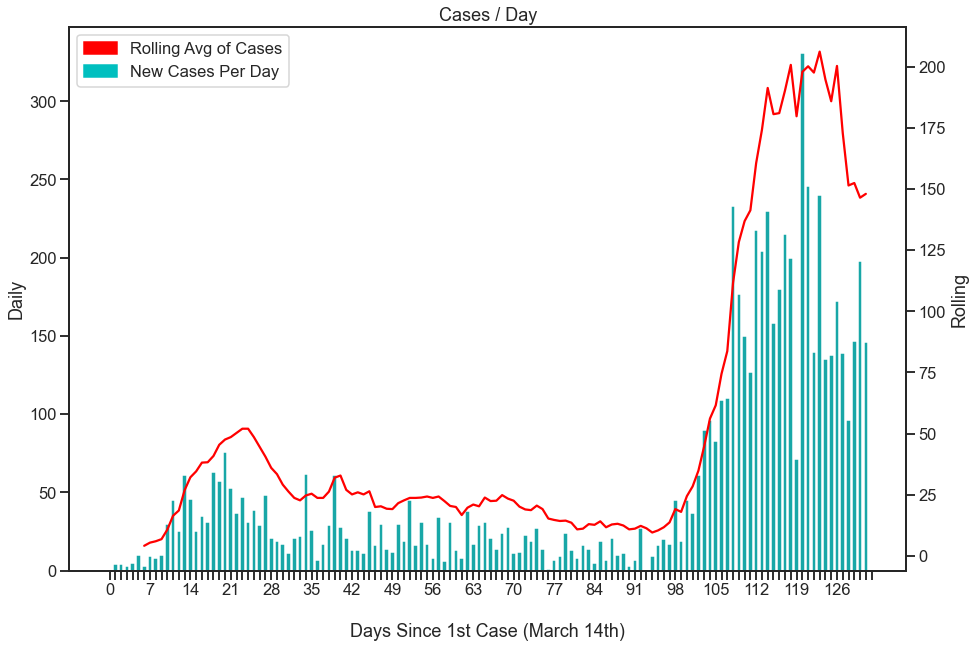

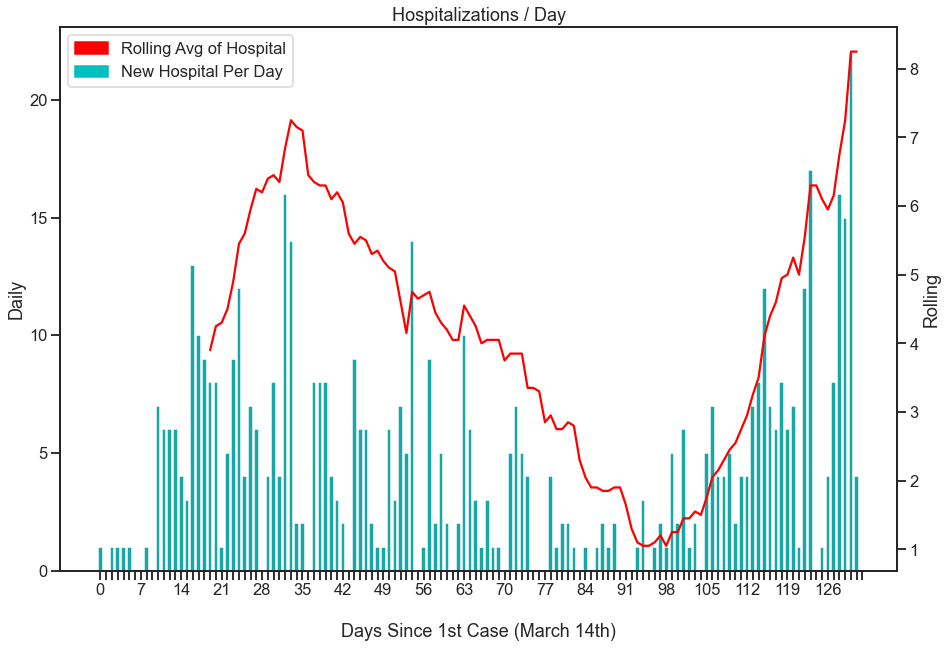

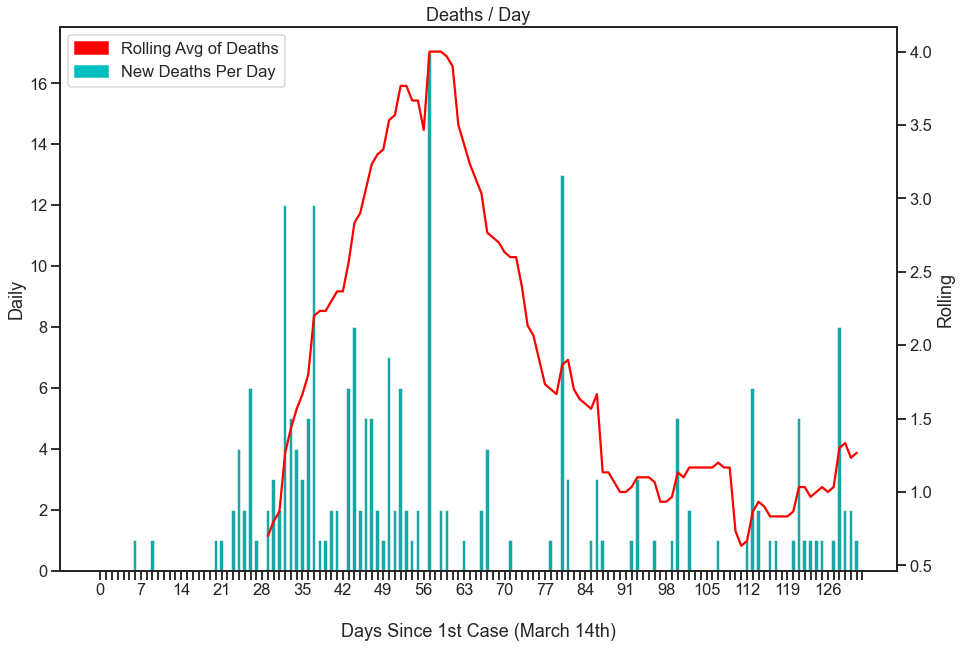

In [2]:
import matplotlib.patches as mpatches
sns.set_context('talk')
sns.set_style('ticks')
def revalue(df, colname, window):
    temp = df[[colname]]
    diff = temp.diff(periods=1) * -1
    roll = diff.sort_index().rolling(window=window).mean().fillna(np.nan).reset_index(drop=True)
    temp = temp.assign(Daily=diff, Rolling=roll)
    temp.loc[temp[colname] == np.nan] = 0
    temp.columns = ['Total', 'Daily', 'Rolling']
    return temp

def show_plot(df, title):
    red_patch = mpatches.Patch(color='r', label=f'Rolling Avg of {title[:8]}')
    cyan_patch = mpatches.Patch(color='c', label=f'New {title[:8]} Per Day')
    fig, ax = plt.subplots(figsize=(15, 10))
    int_index = df.index.astype('int')
    g = sns.barplot(x=int_index, y='Daily', data=df, color='c', ax=ax)
    ax2 = ax.twinx()
    g = sns.lineplot(x=int_index, y='Rolling', data=df, color='r', ax=ax2)
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::7]))
    for label in temp:
        label.set_visible(False)
    ax.set(xlabel='\nDays Since 1st Case (March 14th)')
    ax.set(title=f'{title} / Day')
    ax.legend(handles=[red_patch, cyan_patch], loc='upper left')
    plt.savefig(f'output/{title.lower()}_output.png')
    plt.show()

_all = revalue(df, 'All Cases', 7)
_hosp = revalue(df, 'Hospitalizations', 20)
_death = revalue(df, 'Deaths', 30)
show_plot(_all, 'Cases')
show_plot(_hosp, 'Hospitalizations')
show_plot(_death, 'Deaths')

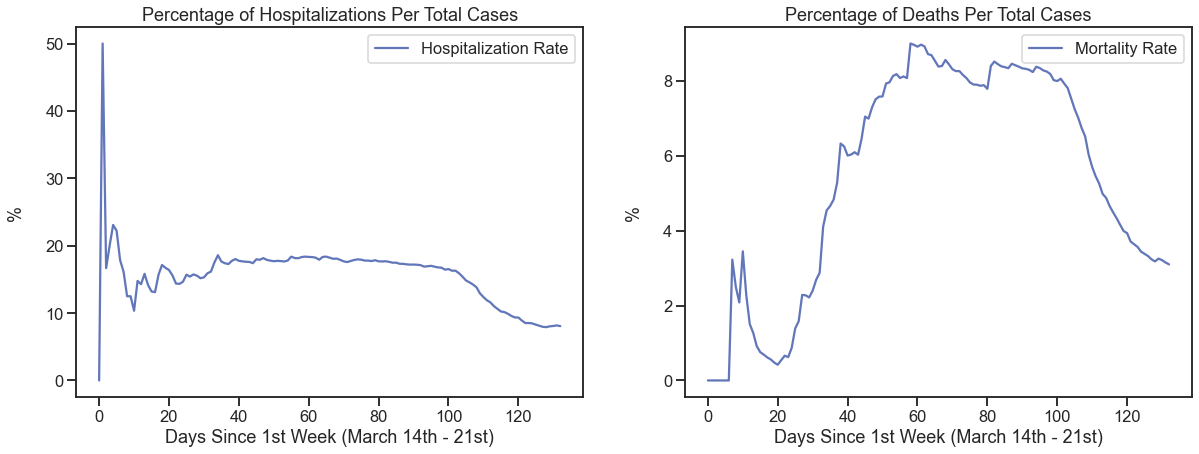

In [3]:
sns.set_palette('twilight_shifted', 3)
plt.figure(figsize=(20, 15))
hospital_rate = pd.DataFrame((df['Hospitalizations'] / df['All Cases'] * 100)).rename(columns={0: 'Hospitalization Rate'})
death_rate = pd.DataFrame((df['Deaths'] / df['All Cases'] * 100)).rename(columns={0: 'Mortality Rate'})
plt.subplot(221); sns.lineplot(data=hospital_rate, dashes=False)
plt.xlabel('Days Since 1st Week (March 14th - 21st)')
plt.ylabel('%', labelpad=20)
plt.title('Percentage of Hospitalizations Per Total Cases')
plt.subplot(222); sns.lineplot(data=death_rate, dashes=False)
plt.xlabel('Days Since 1st Week (March 14th - 21st)')
plt.ylabel('%', labelpad=20)
plt.title('Percentage of Deaths Per Total Cases')
plt.show()